# Random Forest Classifier
## Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor




In [2]:
file = r'YOUR_PATH_FOR_DATA'

df_cancer = pd.read_csv(file)
# Drop the ID column
df_cancer = df_cancer.drop('id', axis = 1)

# Label Encode the response variable
df_cancer['diagnosis'] = LabelEncoder().fit_transform(df_cancer['diagnosis'])
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df_cancer.drop('diagnosis', axis = 1)
y = df_cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 92, stratify = y)

tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
tree.fit(X_train, y_train)

print("Decision Tree Results :")
print("training set score: %f" % tree.score(X_train, y_train))
print("test set score: %f" % tree.score(X_test, y_test))

Decision Tree Results :
training set score: 0.990610
test set score: 0.951049


### RF with default parameters

In [4]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("Random Forest Results :")
print("training set score: %f" % rf.score(X_train, y_train))
print("test set score: %f" % rf.score(X_test, y_test))

Random Forest Results :
training set score: 0.997653
test set score: 0.951049


C:\Users\G523449\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


No handles with labels found to put in legend.


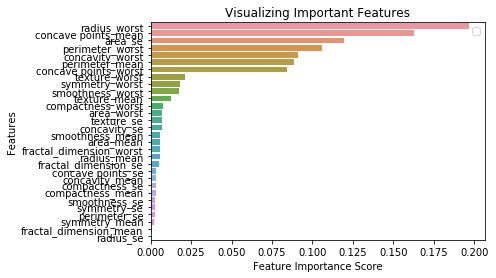

In [5]:
## Feature Importance

feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


### RF with more trees

In [6]:
best_score = 0
n_trees = list(range(10,200, 10))

for trees in n_trees:
    rf_trees = RandomForestClassifier(n_estimators = trees, n_jobs = -1)
    rf_trees.fit(X_train, y_train)
    # Evaluate the score
    
    score = rf_trees.score(X_test, y_test)
    
    print("Trees =", trees, ": Score = ", score)
    if score > best_score:
        best_score = score
        best_parameters = trees

print("Best score = ", best_score)
print("No of Trees = ", best_parameters)
   

Trees = 10 : Score =  0.965034965034965
Trees = 20 : Score =  0.965034965034965
Trees = 30 : Score =  0.965034965034965
Trees = 40 : Score =  0.965034965034965
Trees = 50 : Score =  0.965034965034965
Trees = 60 : Score =  0.972027972027972
Trees = 70 : Score =  0.972027972027972
Trees = 80 : Score =  0.972027972027972
Trees = 90 : Score =  0.9790209790209791
Trees = 100 : Score =  0.972027972027972
Trees = 110 : Score =  0.972027972027972
Trees = 120 : Score =  0.965034965034965
Trees = 130 : Score =  0.9790209790209791
Trees = 140 : Score =  0.965034965034965
Trees = 150 : Score =  0.965034965034965
Trees = 160 : Score =  0.958041958041958
Trees = 170 : Score =  0.972027972027972
Trees = 180 : Score =  0.972027972027972
Trees = 190 : Score =  0.972027972027972
Best score =  0.9790209790209791
No of Trees =  90


No handles with labels found to put in legend.


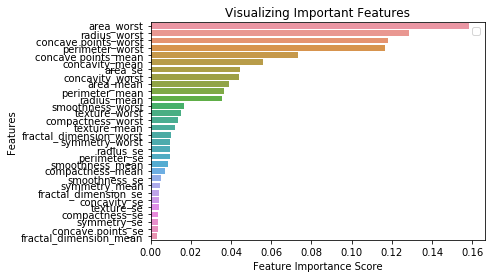

In [7]:
## Now let's see the feature importances with the number of trees = best parametes

rf_trees = RandomForestClassifier(n_estimators = best_parameters, n_jobs = -1)
rf_trees.fit(X_train, y_train)
## Feature Importance

feature_imp = pd.Series(rf_trees.feature_importances_,index=X.columns).sort_values(ascending=False)


sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### RF with cross-validation

In [8]:
from sklearn.model_selection import GridSearchCV
n_trees = list(range(50,100, 10))
depth = list(range(4,7))
split = list(range(2,4))




param_grid = { 'max_depth' : depth,
             'min_samples_split' : split,
             'n_estimators' : n_trees}

rf_grid = RandomForestClassifier(n_jobs = -1)

grid_search_rf = GridSearchCV(rf_grid, param_grid, cv=5, verbose=1)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   32.1s finished
C:\Users\G523449\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 6], 'min_samples_split': [2, 3], 'n_estimators': [50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best Parameters =  {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 60}
Best score =  0.9624413145539906
Test Accuracy score =  0.965034965034965


No handles with labels found to put in legend.


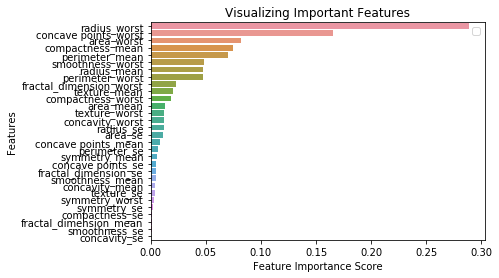

In [9]:
print("Best Parameters = ", grid_search_rf.best_params_)
print("Best score = ", grid_search_rf.best_score_)
print("Test Accuracy score = ", grid_search_rf.score(X_test, y_test))

## Now let's create a random forest with the best parameters

rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_best.fit(X_train, y_train)

feature_imp = pd.Series(rf_best.feature_importances_,index=X.columns).sort_values(ascending=False)


sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [10]:
## Let's remove the factors which are of least importance
print(feature_imp)
print(feature_imp.index)

radius_worst               0.289121
concave points_worst       0.165662
area_worst                 0.082083
compactness_mean           0.074347
perimeter_mean             0.070227
smoothness_worst           0.048252
radius_mean                0.047688
perimeter_worst            0.047384
fractal_dimension_worst    0.023229
texture_mean               0.020319
compactness_worst          0.018866
area_mean                  0.013476
texture_worst              0.012306
concavity_worst            0.012062
radius_se                  0.011870
area_se                    0.011037
concave points_mean        0.008732
perimeter_se               0.006549
symmetry_mean              0.005960
concave points_se          0.004787
fractal_dimension_se       0.004585
smoothness_mean            0.004466
concavity_mean             0.004445
texture_se                 0.003854
symmetry_worst             0.003303
symmetry_se                0.001890
compactness_se             0.001430
fractal_dimension_mean     0

In [11]:
cols_to_drop = ['symmetry_worst', 'radius_se', 'texture_mean',
       'smoothness_mean', 'smoothness_worst', 'smoothness_se', 'symmetry_se',
       'compactness_se', 'fractal_dimension_mean', 'texture_se', 'radius_mean',
       'fractal_dimension_se', 'concavity_se', 'compactness_mean',
       'symmetry_mean', 'compactness_worst', 'concave points_se',
       'perimeter_se'
               ]

X_train = X_train.drop(cols_to_drop, axis = 1)
X_test = X_test.drop(cols_to_drop, axis = 1)



In [12]:
X_train.shape

(426, 12)

In [13]:
rf_grid = RandomForestClassifier(n_jobs = -1)

grid_search_rf = GridSearchCV(rf_grid, param_grid, cv=5)

grid_search_rf.fit(X_train, y_train)



C:\Users\G523449\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 6], 'min_samples_split': [2, 3], 'n_estimators': [50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
print("Best Parameters = ", grid_search_rf.best_params_)
print("Best score = ", grid_search_rf.best_score_)
print("Test Accuracy score = ", grid_search_rf.score(X_test, y_test))



Best Parameters =  {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 80}
Best score =  0.9647887323943662
Test Accuracy score =  0.965034965034965


No handles with labels found to put in legend.


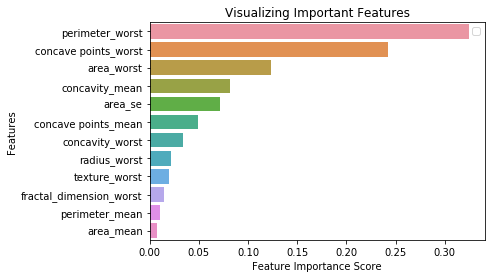

In [15]:
## Now let's create a random forest with the best parameters

rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_best.fit(X_train, y_train)

feature_imp = pd.Series(rf_best.feature_importances_,index=X_train.columns).sort_values(ascending=False)


sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()